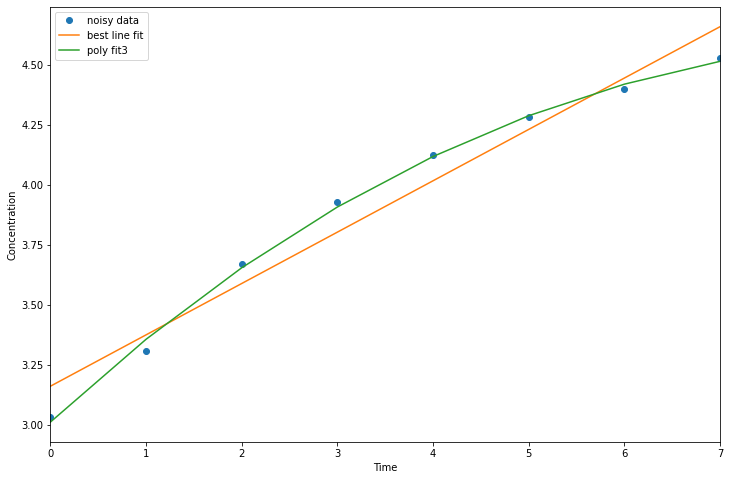

The polyfit curve is better, using the functions polyfit and polyval.
They provide a curve that is closest to all of the points with the least deviation.
But, knowing that the concentration should be going up with time, the linear one is probably more accurate.


In [7]:
#Program to generate a data with random noise and fit the data
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Data taken from exercise from:
#OhioUniversityFalculty.com/youngt/intnummeth/lecture20.pdf

'''
[Time, Concentration], [0, 3.033], [1, 3.306], [2, 3.672], 
[3, 3.929], [4, 4.123], [5, 4.282], [6, 4.399], [7, 4.527]
'''

plt.figure(figsize=[12,8])
#For best line fits
y1 = 3.033
y2 = 4.527
x1 = 0
x2 = 7
m = 0.214

#define the function
f = lambda x: m*x + 3.161

#noisy data points
X_noise = [0,1,2,3,4,5,6,7]
Y_noise = [3.033, 3.306, 3.672, 3.929, 4.123, 4.282, 4.399, 4.527]

#parameters for plot
a,b = 0,7
npoints = 8

#make arrays for best line fit
x = np.linspace(a, b, npoints)

#For Polynomial Fitting
#these functions minimize the squared error
order = 3
fit = np.polyfit(X_noise, Y_noise, order, full=True) #gives function for fitting
p = np.polyval(fit[0], X_noise)                      #assigns values to function from polyfit

plt.plot(X_noise, Y_noise, 'o', label='noisy data')
plt.plot(x, f(x), label='best line fit')
plt.plot(X_noise, p, label='poly fit' + str(order))

plt.xlim([a,b])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

print('The polyfit curve is better, using the functions polyfit and polyval.')
print('They provide a curve that is closest to all of the points with the least deviation.')
print('But, knowing that the concentration should be going up with time, the linear one is probably more accurate.')

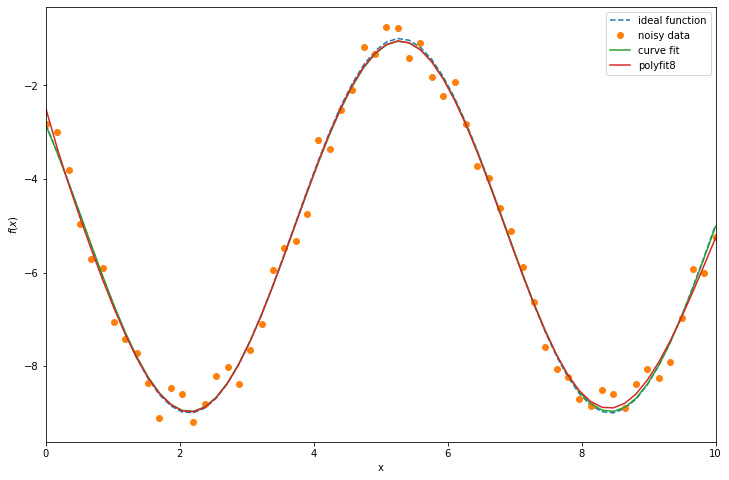

In [18]:
#Lets try it with random data points
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=[12,8])

#define function
f = lambda x,a,b,c: a**2 * np.cos(x+b) - c  

#parameters for plot
x_min, x_max = 0, 10
npoints = 60
a,b,c = 2, 1, 5

#aarays to hold coordinates
np.random.seed(23)
x = np.linspace(x_min, x_max, npoints)
y = f(x,a,b,c) + np.random.rand(npoints) - 0.5

#for curve fit
#finds the best fit parameters
parameter, extras = curve_fit(f, x, y)

#for poly fit
order = 8
fit = np.polyfit(x, y, order, full=True)
Yp = np.polyval(fit[0], x)

#make plot
plt.plot(x, f(x,a,b,c), '--', label='ideal function')
plt.plot(x, y, 'o', label='noisy data')
plt.plot(x, f(x, parameter[0], parameter[1], parameter[2]), label='curve fit')
plt.plot(x, Yp, label='polyfit' + str(order))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([x_min, x_max])
plt.legend()
plt.show()

print('Curve_fit is the best because it is very close to the ideal function.')
print('Polyfit is closest at order 8 but still not as good.')